# Import Libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import calendar
get_ipython().run_line_magic('matplotlib', 'inline')

# Read Data

In [43]:
NR_trip_history = pd.read_csv('Nice_ride_trip_history_2017_season.csv', parse_dates = ['Start date'])
NR_trip_history['Start date'] = NR_trip_history['Start date'].dt.date
NR_trip_history.set_index(['Start date'])
# NR_location = pd.read_csv('Nice_Ride_2017_Station_Locations.csv')
NR_weather = pd.read_csv('WeatherDailyMinneapolis2017.csv',index_col = 'DATE', parse_dates = True)

In [50]:
NR_trip_history = NR_trip_history.set_index(['Start date'])
NR_trip_history.head()

,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
Start date,,,,,,,
2017-11-05,Hennepin Ave & S Washington Ave,30184,11/5/2017 22:02,Logan Park,30104,Member,1048
2017-11-05,Broadway Street N & 4th Street E,30122,11/5/2017 22:26,Broadway Street N & 4th Street E,30122,Member,2513
2017-11-05,Dale Street & Grand Ave.,30106,11/5/2017 22:13,N Milton Street & Summit Ave,30101,Member,1817
2017-11-05,Weisman Art Museum,30183,11/5/2017 22:05,22nd Ave S & Franklin Ave,30014,Casual,1399
2017-11-05,South 2nd Street & 3rd Ave S,30030,11/5/2017 21:44,6th Ave SE & University Ave,30088,Member,370


In [7]:
NR_location.head()

,Number,Name,Latitude,Longitude,Total docks
0,30000,100 Main Street SE,44.984892,-93.256551,27
1,30001,25th Street & 33rd Ave S,44.957341,-93.223374,15
2,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149,15
3,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269,15
4,30004,11th Street & Hennepin,44.975340,-93.278690,23


In [30]:
NR_weather.head()

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
2017-01-01,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.00,26,18
2017-01-02,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.00,31,20
2017-01-03,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.01,30,25
2017-01-04,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.00,25,-6
2017-01-05,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.01,2,-8


# Summary

In [5]:
print(NR_trip_history.describe())
# print(NR_location.describe())
# print(NR_weather.describe())

       Total duration (Seconds)
count              4.607180e+05
mean               2.276507e+03
std                4.393244e+04
min                6.000000e+01
25%                4.080000e+02
50%                7.640000e+02
75%                1.483000e+03
max                1.135480e+07


# Total duration distribution (Members vs Casual)

count     460718
unique         3
top       Member
freq      290070
Name: Account type, dtype: object


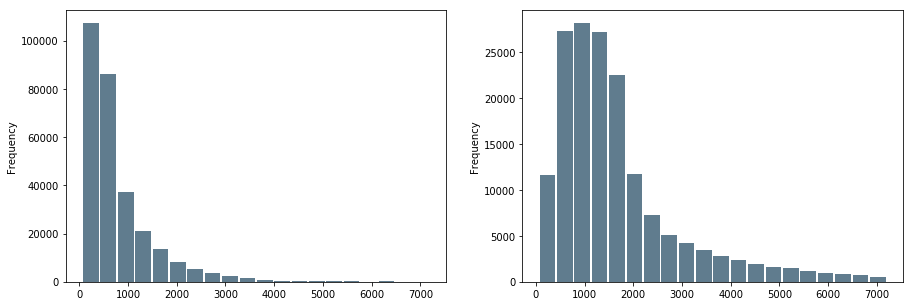

In [44]:
print(NR_trip_history['Account type'].describe())
# Duration
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1, 2, 1)
NR_trip_history_Member = NR_trip_history[NR_trip_history['Account type'] == 'Member']
### Taking threshold of 2 hours to remove outliers
NR_trip_history_Member = NR_trip_history_Member[NR_trip_history_Member['Total duration (Seconds)'] < 7200]
NR_trip_history_Member['Total duration (Seconds)'].plot.hist(bins=20, rwidth=0.9,
                   color='#607c8e')

plt.subplot(1, 2, 2)
NR_trip_history_Casual = NR_trip_history[NR_trip_history['Account type'] == 'Casual']
### Taking threshold of 2 hours to remove outliers
NR_trip_history_Casual = NR_trip_history_Casual[NR_trip_history_Casual['Total duration (Seconds)'] < 7200]
NR_trip_history_Casual['Total duration (Seconds)'].plot.hist(bins=20, rwidth=0.9,
                   color='#607c8e')

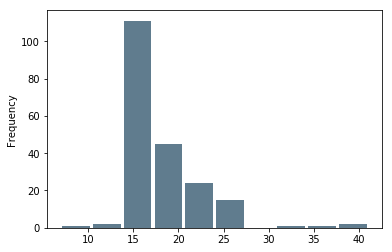

In [7]:
# Total Docks
NR_location['Total docks'].plot.hist(grid=False, bins=10, rwidth=0.9,
                   color='#607c8e')  

In [8]:
print(NR_location['Total docks'].mean())
print(NR_location['Total docks'].median())

18.059405940594058
15.0


{'whiskers': [<matplotlib.lines.Line2D at 0x29832c85630>,
 'caps': [<matplotlib.lines.Line2D at 0x29832d1e860>,
 'boxes': [<matplotlib.lines.Line2D at 0x29832d10da0>],
 'medians': [<matplotlib.lines.Line2D at 0x29832d1eef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29832d1efd0>],
 'means': []}

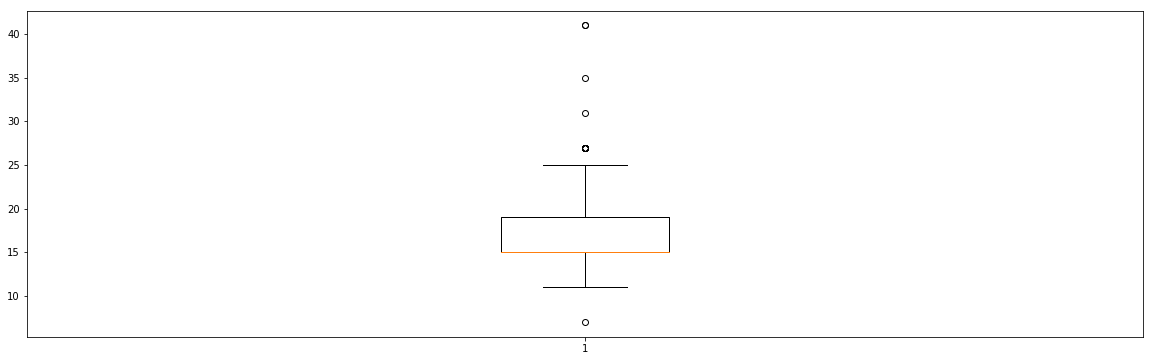

In [9]:
# Create a figure instance
fig = plt.figure(1, figsize=(20, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.boxplot(NR_location['Total docks'])

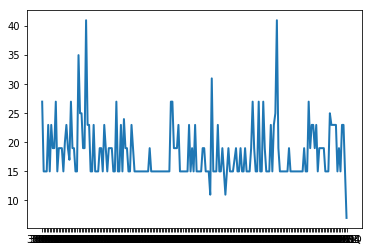

In [12]:
plt.plot(NR_location['Number'],NR_location['Total docks'], linewidth=2.0)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

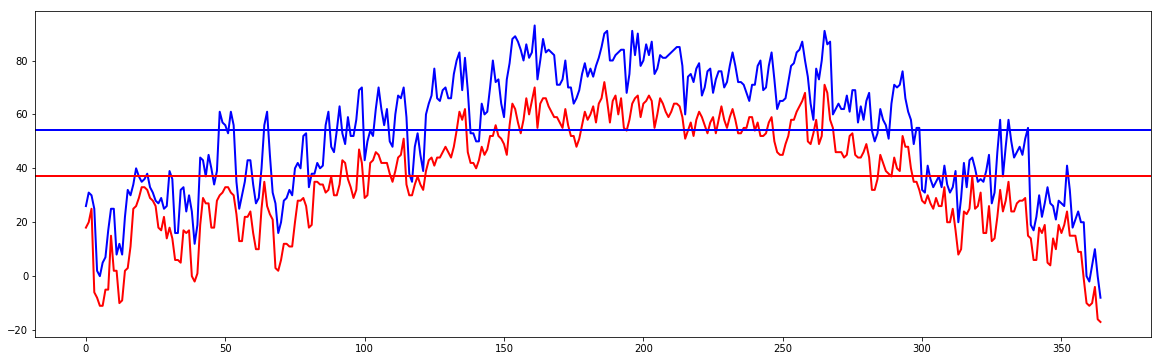

In [11]:
# Create a figure instance
fig = plt.figure(1, figsize=(20, 6))
plt.plot(NR_weather['TMAX'],color = 'b', linewidth=2.0)
plt.plot(NR_weather['TMIN'], color = 'r', linewidth=2.0)
plt.axhline(y = NR_weather['TMAX'].mean(),color = 'b', linewidth=2.0)
plt.axhline(y = NR_weather['TMIN'].mean(), color = 'r', linewidth=2.0)
plt.show

In [18]:
# type(NR_trip_history['Start date'])
NR_trip_history['Start date'] = pd.to_datetime(NR_trip_history['Start date'])
NR_weather['DATE'] = pd.to_datetime(NR_weather['DATE'])

In [55]:
NR_History_Weather = pd.merge(NR_trip_history, NR_weather, left_index = True, right_index = True, how = 'left')
NR_History_Weather.head()

,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds),STATION,NAME,PRCP,TMAX,TMIN
2017-04-03,University Ave SE & Bedford Street SE,30191,4/3/2017 23:43,Sanford Hall,30182,Casual,755,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,53,43
2017-04-03,McNamara Center,30057,4/3/2017 23:36,4th Street & 17th Ave SE,30032,Member,361,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,53,43
2017-04-03,Washington Ave SE & Union Street SE,30115,4/3/2017 23:25,Delaware Street SE & 26th Ave SE,30189,Member,297,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,53,43
2017-04-03,4th Street & 17th Ave SE,30032,4/3/2017 23:23,McNamara Center,30057,Member,290,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,53,43
2017-04-03,4th Street & 17th Ave SE,30032,4/3/2017 23:20,15th Ave SE & 4th Street SE,30197,Member,132,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,53,43


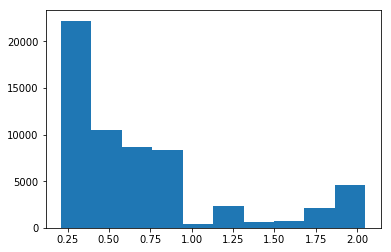

In [105]:
plt.hist(NR_History_Weather[NR_History_Weather.PRCP > 0.2]['PRCP'])
plt.show()

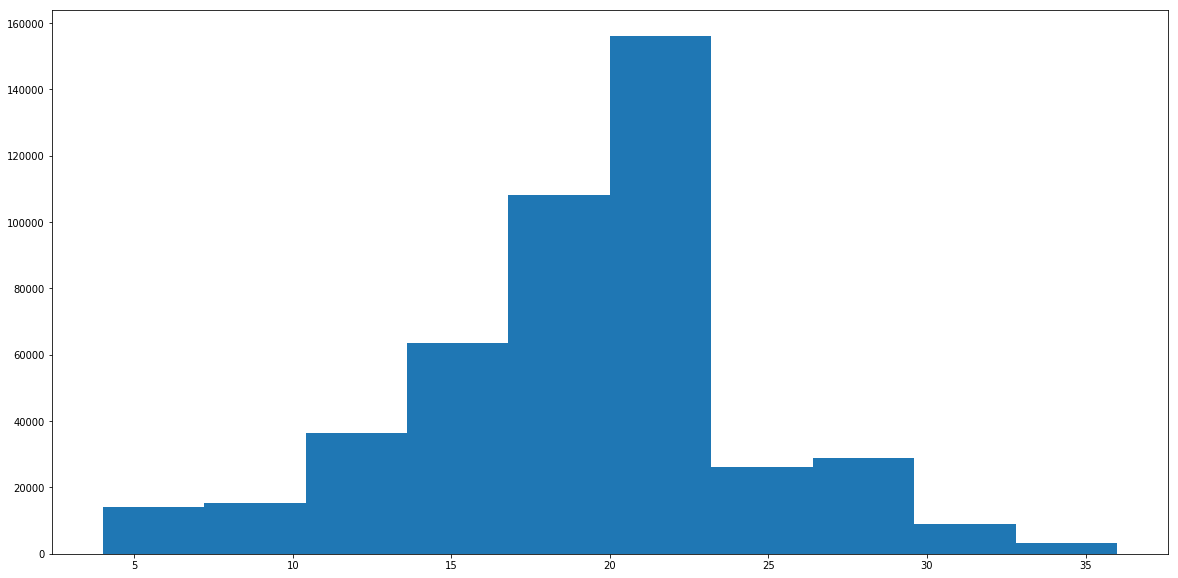

In [122]:
plt.figure(figsize=(20,10))
NR_History_Weather['TDIFF'] = NR_History_Weather['TMAX'] - NR_History_Weather['TMIN']
plt.hist(NR_History_Weather['TDIFF'])
plt.show()
# Increase in trips is observed with increasing change in temperature till 20F change in a day and then it suddenly drops down

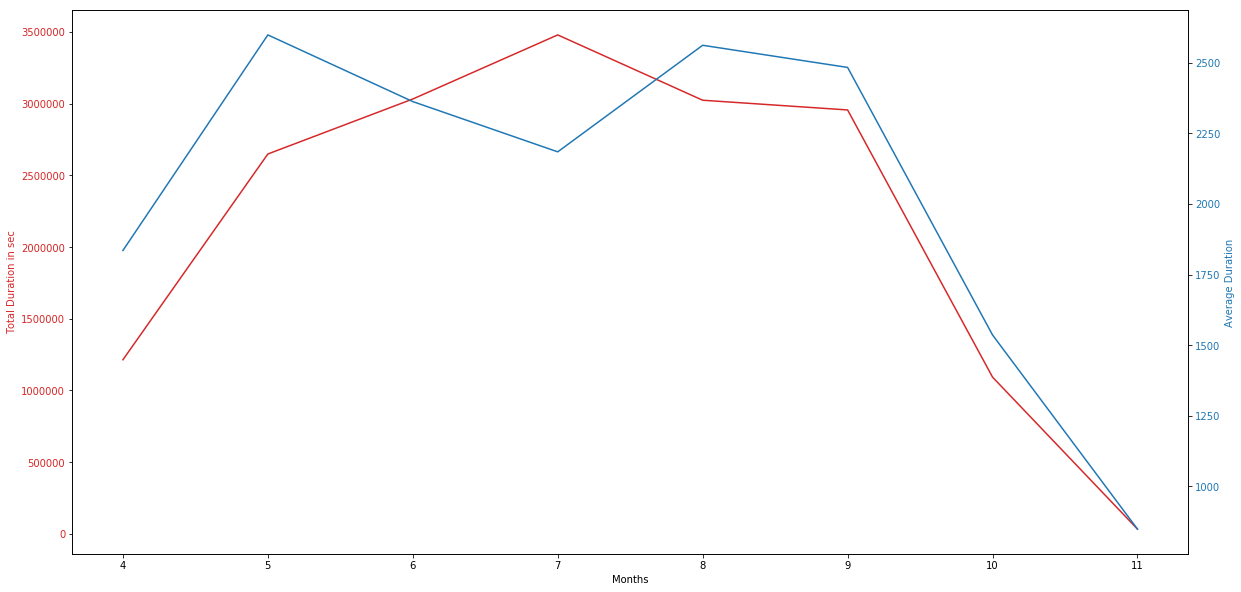

,Total duration (Seconds),PRCP,TMAX,TMIN,TDIFF,Total Time
Month,,,,,,
4,1835.175618,0.103031,56.951428,38.756840,18.194589,1.214091e+06
5,2598.438551,0.109751,67.516881,47.514134,20.002747,2.648892e+06
6,2362.369271,0.090132,78.293505,58.373517,19.919989,3.032258e+06
7,2184.430394,0.057849,81.371628,62.213496,19.158132,3.479288e+06
8,2561.728531,0.232844,74.104967,56.560927,17.544040,3.023779e+06
9,2483.296869,0.035269,73.333749,54.359091,18.974658,2.956034e+06
10,1536.098920,0.157477,60.488838,41.520110,18.968729,1.092960e+06
11,848.753413,0.037201,35.471843,27.470990,8.000853,3.315797e+04


In [170]:
# plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))
NR_History_Weather['Month'] = pd.DatetimeIndex(NR_History_Weather.index).month
# NR_History_Weather['Month'] = NR_History_Weather['Month'].apply(lambda x: calendar.month_abbr[x])
NR_History_Weather1 = NR_History_Weather
NR_History_Weather2 = NR_History_Weather1.groupby('Month').agg('mean')
NR_History_Weather2['Total Time'] = NR_History_Weather1['Total duration (Seconds)'].groupby(NR_History_Weather1.index.month).agg('sum')
NR_History_Weather2['Total Time'] = NR_History_Weather2['Total Time'] / 60
color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Total Duration in sec', color=color)
ax1.plot(NR_History_Weather2.index, NR_History_Weather2['Total Time'].values, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Average Duration', color=color)
ax2.plot(NR_History_Weather2.index, NR_History_Weather2['Total duration (Seconds)'].values )
ax2.tick_params(axis='y', labelcolor=color)
plt.show()
NR_History_Weather2
# 

In [164]:
NR_History_Weather2
NR_History_Weather1['Total duration (Seconds)'].groupby(NR_History_Weather1.index.month).agg('sum')

4      72845461
5     158933494
6     181935507
7     208757275
8     181426738
9     177362029
10     65577599
11      1989478
Name: Total duration (Seconds), dtype: int64